<a href="https://colab.research.google.com/github/mrlncredible/balakin_rep/blob/main/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Распознавание изображений из набора данных MNIST, CIFAR-10 и базы автомобилей с помощью свёрточных нейронных сетей**
---

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.



**Импорт библиотек для работы всего ноутбука**

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Распознавание марок машин (маленькая база)

In [ ]:
import gdown
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://storage.googleapis.com/datasets_ai/Base/5_Conv/middle_fmr.zip', None, quiet=True)

'middle_fmr.zip'

In [ ]:
!unzip -q "middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 8 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_height, img_width), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_height, img_width), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


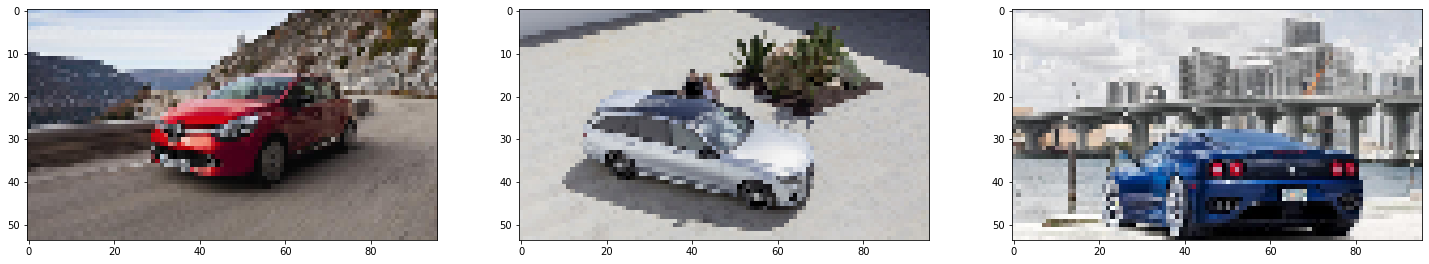

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()


model.add(BatchNormalization(input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 2))) 


model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 4)))




#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())


#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))

#Выходной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00025), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


342/342 [==============================] - 29s 83ms/step - loss: 0.9897 - accuracy: 0.4878 - val_loss: 0.9633 - val_accuracy: 0.4912
Epoch 2/50
342/342 [==============================] - 28s 83ms/step - loss: 0.8723 - accuracy: 0.5726 - val_loss: 0.9353 - val_accuracy: 0.5162
Epoch 3/50
342/342 [==============================] - 28s 82ms/step - loss: 0.8341 - accuracy: 0.6011 - val_loss: 1.0331 - val_accuracy: 0.4956
Epoch 4/50
342/342 [==============================] - 28s 83ms/step - loss: 0.8077 - accuracy: 0.6216 - val_loss: 0.9217 - val_accuracy: 0.5721
Epoch 5/50
342/342 [==============================] - 29s 83ms/step - loss: 0.7877 - accuracy: 0.6402 - val_loss: 0.9040 - val_accuracy: 0.5824
Epoch 6/50
342/342 [==============================] - 29s 84ms/step - loss: 0.7564 - accuracy: 0.6658 - val_loss: 0.8871 - val_accuracy: 0.6132
Epoch 7/50
342/342 [==============================] - 29s 84ms/step - loss: 0.7448 - accuracy: 0.6673 - val_loss: 0.8749 - val_accuracy: 0.5809
Epo

In [ ]:
model.save('cars3.h5')

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from io import BytesIO
from PIL import Image 


INPUT_SHAPE = (64, 168, 3)

model = load_model('cars3.h5', compile = False)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 54, 96, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 54, 96, 32)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 96, 32)        4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 48, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 48, 64)        1

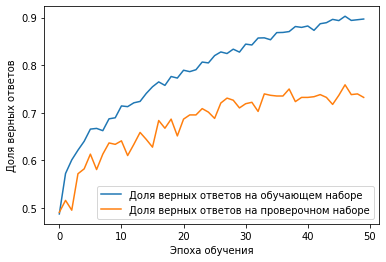

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy']) #Уменьшил скорость обучения в 25 раз 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


342/342 [==============================] - 29s 84ms/step - loss: 0.1646 - accuracy: 0.9393 - val_loss: 0.7678 - val_accuracy: 0.7779
Epoch 2/20
342/342 [==============================] - 29s 85ms/step - loss: 0.1682 - accuracy: 0.9386 - val_loss: 0.7983 - val_accuracy: 0.7603
Epoch 3/20
342/342 [==============================] - 29s 85ms/step - loss: 0.1645 - accuracy: 0.9378 - val_loss: 0.7702 - val_accuracy: 0.7588
Epoch 4/20
342/342 [==============================] - 29s 85ms/step - loss: 0.1565 - accuracy: 0.9408 - val_loss: 0.8448 - val_accuracy: 0.7456
Epoch 5/20
342/342 [==============================] - 29s 85ms/step - loss: 0.1426 - accuracy: 0.9532 - val_loss: 0.8447 - val_accuracy: 0.7471
Epoch 6/20
342/342 [==============================] - 29s 84ms/step - loss: 0.1478 - accuracy: 0.9433 - val_loss: 0.7899 - val_accuracy: 0.7868
Epoch 7/20
342/342 [==============================] - 29s 84ms/step - loss: 0.1342 - accuracy: 0.9539 - val_loss: 0.8568 - val_accuracy: 0.7559
Epo

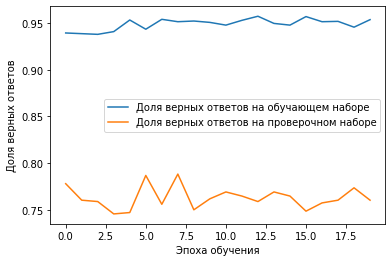

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000001), metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


342/342 [==============================] - 29s 82ms/step - loss: 0.1292 - accuracy: 0.9499 - val_loss: 0.8969 - val_accuracy: 0.7824
Epoch 2/10
342/342 [==============================] - 28s 81ms/step - loss: 0.1187 - accuracy: 0.9550 - val_loss: 0.9048 - val_accuracy: 0.7735
Epoch 3/10
342/342 [==============================] - 28s 81ms/step - loss: 0.1257 - accuracy: 0.9506 - val_loss: 0.8979 - val_accuracy: 0.7706
Epoch 4/10
342/342 [==============================] - 28s 81ms/step - loss: 0.1252 - accuracy: 0.9517 - val_loss: 0.8747 - val_accuracy: 0.7721
Epoch 5/10
342/342 [==============================] - 28s 82ms/step - loss: 0.1292 - accuracy: 0.9514 - val_loss: 0.8835 - val_accuracy: 0.7809
Epoch 6/10
342/342 [==============================] - 28s 81ms/step - loss: 0.1276 - accuracy: 0.9525 - val_loss: 0.9325 - val_accuracy: 0.7588
Epoch 7/10
342/342 [==============================] - 28s 82ms/step - loss: 0.1138 - accuracy: 0.9605 - val_loss: 0.8614 - val_accuracy: 0.7676
Epo

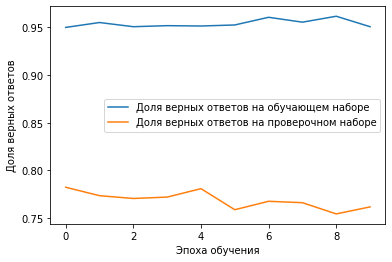

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0000001), metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


342/342 [==============================] - 31s 89ms/step - loss: 0.1282 - accuracy: 0.9569 - val_loss: 0.9160 - val_accuracy: 0.7647
Epoch 2/10
342/342 [==============================] - 31s 89ms/step - loss: 0.1240 - accuracy: 0.9514 - val_loss: 0.9195 - val_accuracy: 0.7515
Epoch 3/10
342/342 [==============================] - 30s 88ms/step - loss: 0.1278 - accuracy: 0.9569 - val_loss: 0.8752 - val_accuracy: 0.7676
Epoch 4/10
342/342 [==============================] - 30s 87ms/step - loss: 0.1237 - accuracy: 0.9572 - val_loss: 0.8671 - val_accuracy: 0.7706
Epoch 5/10
342/342 [==============================] - 30s 87ms/step - loss: 0.1107 - accuracy: 0.9631 - val_loss: 0.9141 - val_accuracy: 0.7500
Epoch 6/10
342/342 [==============================] - 30s 86ms/step - loss: 0.1217 - accuracy: 0.9605 - val_loss: 0.8637 - val_accuracy: 0.7721
Epoch 7/10
342/342 [==============================] - 30s 87ms/step - loss: 0.1015 - accuracy: 0.9627 - val_loss: 0.8621 - val_accuracy: 0.7574
Epo

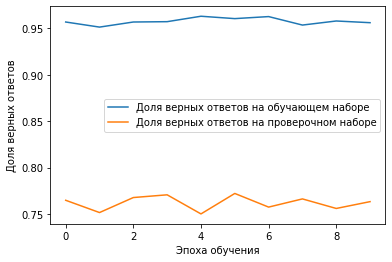

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00000001), metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


342/342 [==============================] - 30s 87ms/step - loss: 0.1326 - accuracy: 0.9499 - val_loss: 0.8549 - val_accuracy: 0.7735
Epoch 2/20
342/342 [==============================] - 30s 88ms/step - loss: 0.1244 - accuracy: 0.9536 - val_loss: 0.8586 - val_accuracy: 0.7676
Epoch 3/20
342/342 [==============================] - 30s 88ms/step - loss: 0.1246 - accuracy: 0.9528 - val_loss: 0.8752 - val_accuracy: 0.7750
Epoch 4/20
342/342 [==============================] - 30s 88ms/step - loss: 0.1190 - accuracy: 0.9543 - val_loss: 0.9502 - val_accuracy: 0.7735
Epoch 5/20
342/342 [==============================] - 30s 88ms/step - loss: 0.1232 - accuracy: 0.9565 - val_loss: 0.8797 - val_accuracy: 0.7676
Epoch 6/20
342/342 [==============================] - 30s 88ms/step - loss: 0.1251 - accuracy: 0.9510 - val_loss: 0.8791 - val_accuracy: 0.7765
Epoch 7/20
342/342 [==============================] - 30s 87ms/step - loss: 0.1306 - accuracy: 0.9484 - val_loss: 0.9170 - val_accuracy: 0.7662
Epo

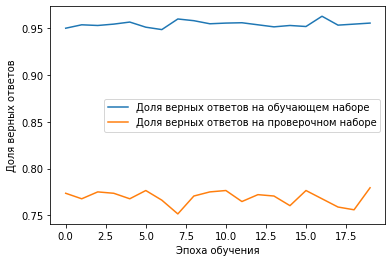

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000000001), metrics=['accuracy'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


342/342 [==============================] - 31s 88ms/step - loss: 0.1192 - accuracy: 0.9565 - val_loss: 0.8706 - val_accuracy: 0.7647
Epoch 2/20
342/342 [==============================] - 30s 88ms/step - loss: 0.1263 - accuracy: 0.9550 - val_loss: 0.8791 - val_accuracy: 0.7603
Epoch 3/20
342/342 [==============================] - 30s 89ms/step - loss: 0.1152 - accuracy: 0.9572 - val_loss: 0.9485 - val_accuracy: 0.7309
Epoch 4/20
342/342 [==============================] - 30s 89ms/step - loss: 0.1212 - accuracy: 0.9525 - val_loss: 0.8840 - val_accuracy: 0.7632
Epoch 5/20
342/342 [==============================] - 30s 89ms/step - loss: 0.1230 - accuracy: 0.9517 - val_loss: 0.9067 - val_accuracy: 0.7544
Epoch 6/20
342/342 [==============================] - 30s 89ms/step - loss: 0.1288 - accuracy: 0.9543 - val_loss: 0.8864 - val_accuracy: 0.7676
Epoch 7/20
342/342 [==============================] - 30s 89ms/step - loss: 0.1228 - accuracy: 0.9547 - val_loss: 0.8738 - val_accuracy: 0.7559
Epo

#Глоссарий

**Сверточная нейронная сеть** - архитектура нейронных сетей, направленная на решение задачи распознавания образов 

---

**Dense** - полносвязный слой 

**conv2D** - сверточный слой 

**MaxPooling2D** - слой объединения для пространственных данных 

**Dropout** - случайная блокировка нейронов для предотвращения переобучения

**BatchNormalization** - слой пакетной нормализации

**categorical_crossentropy** - метод определения ошибки нейронной сети для категориальных данных (классов). Категориальная кроссцентропия между выходным результатом и y_train.

**Flatten** - слой преобразования двумерных данных в одномерные

#Литература

Для более глубокого понимания использования библиотеки хорошо уметь искать информацию в документациях от разработчика. Официальная документация доступна на английском языке.

**Документация Keras** - https://keras.io/ 

**Русскоязычная документация Keras** - https://ru-keras.com/ 

Помимо официальной документации можно найти огромное количество полезной информации и в других источниках.

**Полезные статьи habr:**

https://habr.com/ru/post/348000/

https://habr.com/ru/post/309508/